In [1]:

# import shap
# import seaborn as sns
from catboost import *
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
#%matplotlib
###########import packages##########
import tensorflow as tf
import keras
from keras import optimizers
from keras import regularizers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.constraints import max_norm
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.models import Model
from keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier 
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import lightgbm
import catboost
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn.tree import ExtraTreeRegressor
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn.impute import SimpleImputer
import keras_metrics as km
from keras.callbacks import EarlyStopping 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from scipy import interp
from itertools import cycle
early_stopping=keras.callbacks.EarlyStopping(
 monitor="val_loss", 
 patience=20, 
 verbose=0, 
 mode="auto"
)
from sklearn.metrics import r2_score
#%matplotlib
###########wrapping root mean square error for later calls##########
def compute_mae_mse_rmse(target,prediction):
    error = []
    for i in range(len(target)):
        error.append(target[i] - prediction[i])
    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)  # target-prediction之差平方
        absError.append(abs(val))  # 误差绝对值
    mae=sum(absError)/len(absError)  # 平均绝对误差MAE
    mse=sum(squaredError)/len(squaredError)  # 均方误差MSE
    RMSE=np.sqrt(sum(squaredError)/len(squaredError))
    R2=r2_score(target,prediction)
    return mae,mse,RMSE,R2
###########wrap up fuction for later call for OPTIMIZATION##########
def evaluate(pre_2,real_2):
    pre_2=np.array(pre_2)
    real_2=np.array(real_2)
    pre_2_series=pd.Series(pre_2)
    real_2_series=pd.Series(real_2)
    return rmse(pre_2,real_2), round(pre_2_series.corr(real_2_series), 3)
def compare(list_name,limit):
    judge=1
    for a in list_name:
        if a < limit:
            judge=judge*1
        else:
            judge=judge*0
    return judge
def generate_arrays_from_file(path):
    while True:
        with open(path) as f:
            for line in f:
                # create numpy arrays of input data
                # and labels, from each line in the file
                x1, x2, y = process_line(line)
                yield ({'input_1': x1, 'input_2': x2}, {'output': y})
def intergate(y_pred):
    length=y_pred.shape[0]
    print(length)
    for i in range (0,length):
        if y_pred[i][0]>=0.5:
            y_pred[i][0]=1
        else:
            y_pred[i][0]=0
    return y_pred
accuracy={}
###########loading data##########
fdata=pd.read_csv('database_filled_CD.csv',encoding="gbk")
raw_data=fdata.loc[:,[
                      'Operating Temperature (℃)',#0
                      'Flow Rate (mL min-1)',#1    
                      'Active Area (cm2)', #2
                      'Ir wt. %',#3
                      'Ru wt.%',#4
                      'O wt. %',#5
                      'I/C in Anode',#6
                      'Pt wt. %',#7
                      'I/C in Cathode',#8  
                      'Anode Precious Metal Loading (mg cm-2 Ir/Ru/Pt/Pd)',#9
                      'Cathode Precious Metal Loading (mg cm-2 Pt/Pd)',#10
                      'Membrane Thickness (μm)',#11
                      'EW'#12
]]
###########data standardization##########
standardized_data = (raw_data-np.mean(raw_data,axis=0))/np.std(raw_data,axis=0)
###########defining a wrapper function for later call from each machine learning algorithms##########
raw_input=standardized_data.iloc[:,0:13]
raw_input_global=raw_data.iloc[:,0:13]
print('ready')

ready


In [2]:
CD16=fdata.loc[:,['Current at 1.6 V']].values

In [3]:
def summarize(list1):
    total=0
    for ele in range(0, len(list1)):
        total = total + list1[ele]
    return total

In [4]:
seed=296
###########train test splitting##########
X_train, X_test, y_train, y_test = train_test_split(raw_input, CD16, test_size=.15,random_state=seed)

training...
TEST SET scatter corr -0.26331 scatter error (0.47770861280075433, 0.5703798914220968, 0.7552349908618488, -0.21522184290828505) TEST R2 -0.21522184290828505
TRAINING SET scatter corr -0.07212 scatter error (0.5894903372395539, 2.148458297718696, 1.4657620194692917, -0.03626453230869964) R2 -0.03626453230869964
200 150 0.0005 0 16 0 relu
training...
TEST SET scatter corr 0.13266 scatter error (1.4974753217965568, 6.190117212220183, 2.48799461659791, -0.04354776039665942) TEST R2 -0.04354776039665942
TRAINING SET scatter corr -0.05024 scatter error (5.7379965455031465, 864.2956711265324, 29.398905951183497, -0.026223537242159756) R2 -0.026223537242159756
200 150 0.00075 0 16 0 relu
training...
TEST SET scatter corr 0.1174 scatter error (0.1381278452888029, 0.0375073389366787, 0.1936681154363792, -1.7689753785886522) TEST R2 -1.7689753785886522
TRAINING SET scatter corr 0.067 scatter error (0.5521923006178455, 7.585551096093581, 2.7541879195315597, -0.025243645078520727) R2 -

KeyboardInterrupt: 

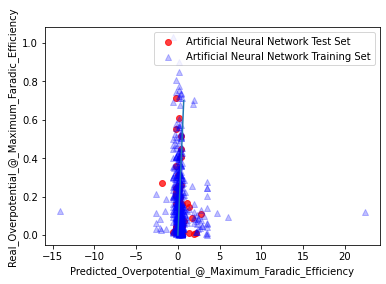

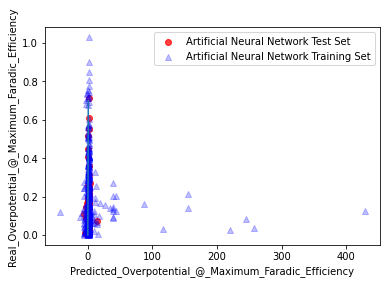

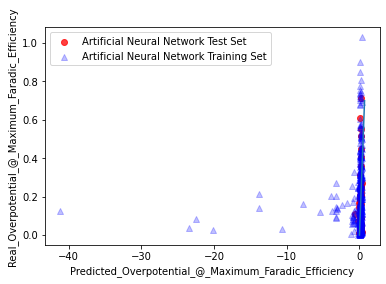

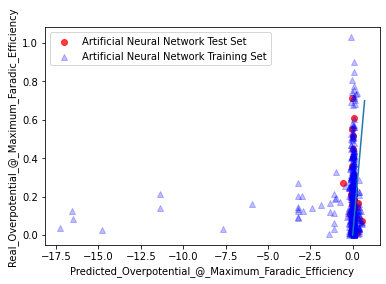

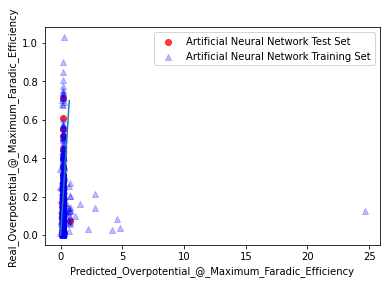

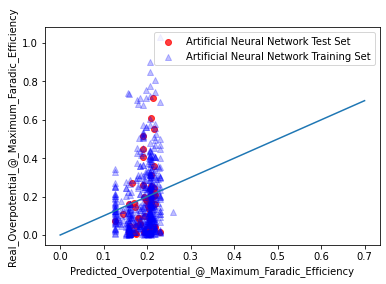

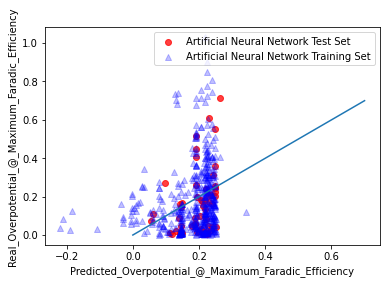

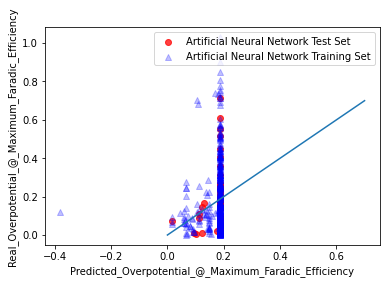

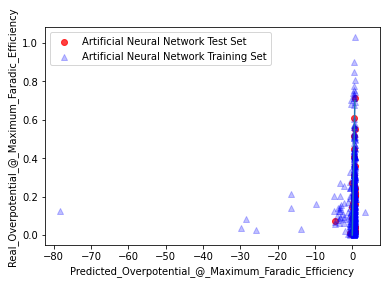

In [7]:
for batch_size_number in [16,24,32]:
    for reg in [0,0.0001,0.001]:
        for dropout_rate in [0,0.1,0.2,0.3,0.4,0.5]:
            for neurons1 in range(200,1000,100):
                for epochs_number in range(150,850,100):
                    for learning_rate_search in [0.0005,0.00075,0.001,0.0025,0.005,0.0075,0.01,0.02]:
                        for activation1 in ['relu']:
                            regularizer=keras.regularizers.l2(reg)
                            ###########keras ANN model construction##########
                            model = Sequential() 
                            model.add(Dense(neurons1, input_dim=13, kernel_initializer='random_normal',
                                            bias_initializer='random_normal',activation=activation1,kernel_regularizer=regularizer)) 
                            model.add(Dropout(dropout_rate))
                            model.add(Dense(neurons1, input_dim=neurons1, kernel_initializer='random_normal',
                                            bias_initializer='random_normal',activation=activation1,kernel_regularizer=regularizer)) 
                            model.add(Dropout(dropout_rate))
                            model.add(Dense(1, input_dim=neurons1, activation='linear'))
                            adam=optimizers.Adam(lr=learning_rate_search)
                            model.compile(loss='mse', optimizer=adam)
                            print('training...')
                            model.fit(X_train, y_train,verbose=0, batch_size=batch_size_number,epochs=epochs_number,validation_split=0.2,callbacks=[early_stopping])
                            result=model.predict(X_test)
                            result_train=model.predict(X_train)
                            ###########get RMSE and R2 on the test set##########
                            x_prediction_07=result[:,0]
                            y_real_07=y_test[:,0]
                            x_prediction_07_series=pd.Series(x_prediction_07)
                            y_real_07_series=pd.Series(y_real_07)
                            #training set
                            x_prediction_07_train=result_train[:,0]
                            y_real_07_train=y_train[:,0]
                            x_prediction_07_series_train=pd.Series(x_prediction_07_train)
                            y_real_07_series_train=pd.Series(y_real_07_train)
                            ###########evaluating the regression quality##########
                            corr_ann = round(x_prediction_07_series.corr(y_real_07_series), 5)
                            error_val= compute_mae_mse_rmse(x_prediction_07,y_real_07)
                            corr_ann_train = round(x_prediction_07_series_train.corr(y_real_07_series_train), 5)
                            error_val_train= compute_mae_mse_rmse(x_prediction_07_train,y_real_07_train)
                            print('TEST SET scatter corr',corr_ann,'scatter error',error_val,'TEST R2',error_val[3])
                            print('TRAINING SET scatter corr',corr_ann_train,'scatter error',error_val_train,'R2',error_val_train[3])
                            print(neurons1,epochs_number,learning_rate_search,dropout_rate,batch_size_number,reg,activation1)                          
                            x_y_x=np.arange(0,2,0.1)
                            x_y_y=np.arange(0,2,0.1)
                            fig = plt.figure()
                            ax = fig.add_subplot(111)
                            ax.scatter(x_prediction_07,y_real_07,color='red',label='Artificial Neural Network Test Set',alpha=0.75)
                            ax.scatter(x_prediction_07_train,y_real_07_train,color='blue',label='Artificial Neural Network Training Set',alpha=0.25,marker="^")
                            ax.plot(x_y_x,x_y_y)
                            plt.legend()
                            plt.xlabel(u"Predicted_Current_Density (mA cm^-2)@1.6V (vs. RHE)")
                            plt.ylabel(u"Real_Current_Density (mA cm^-2)@1.6V (vs. RHE)")
                            plt.savefig('CD16 ANN SEL %s %s %s %s %s %s %s.png' %(neurons1,epochs_number,learning_rate_search,dropout_rate,batch_size_number,reg,activation1))
                            K.clear_session()
print(accuracy)

In [13]:
import eli5
def base_model():
    tmodel = Sequential() 
    tmodel.add(Dense(800, input_dim=13, kernel_initializer='random_normal',
                    bias_initializer='random_normal',activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001))) 
    tmodel.add(Dropout(0.3))
    tmodel.add(Dense(800, input_dim=800, kernel_initializer='random_normal',
                bias_initializer='random_normal',activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001))) 
    tmodel.add(Dropout(0.3))
    tmodel.add(Dense(1, input_dim=800, activation='linear'))
    adam=optimizers.Adam(lr=0.0075)
    tmodel.compile(loss='mse', optimizer=adam)
    return tmodel
from eli5.sklearn import PermutationImportance
my_model = KerasRegressor(build_fn=base_model,nb_epoch=550, batch_size=16, verbose= False)    
my_model.fit(X_train, y_train,validation_split=0.2,callbacks=[early_stopping])
perm = PermutationImportance(my_model, random_state=1,n_iter=10).fit(X_train,y_train)

In [14]:
eli5.show_weights(perm,top=100)

Weight,Feature
0.0320 ± 0.0087,x11
0.0275 ± 0.0047,x0
0.0136 ± 0.0057,x2
0.0123 ± 0.0034,x6
0.0097 ± 0.0061,x8
0.0087 ± 0.0037,x10
0.0062 ± 0.0040,x9
0.0053 ± 0.0018,x7
0.0038 ± 0.0015,x1
0.0036 ± 0.0032,x4


In [15]:
smodel = Sequential() 
smodel.add(Dense(800, input_dim=13, kernel_initializer='random_normal',
                bias_initializer='random_normal',activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001))) 
smodel.add(Dropout(0))
smodel.add(Dense(800, input_dim=800, kernel_initializer='random_normal',
            bias_initializer='random_normal',activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001))) 
smodel.add(Dropout(0))
smodel.add(Dense(1, input_dim=800, activation='linear'))
adam=optimizers.Adam(lr=0.0075)
smodel.compile(loss='mse', optimizer=adam) 
print('training...')
smodel.fit(X_train, y_train,verbose=0, batch_size=16,epochs=550,validation_split=0.2,callbacks=[early_stopping])

training...


In [16]:
import shap
# %matplotlib
standardized_data_SHAP = standardized_data
SHAP_INPUT=standardized_data_SHAP.iloc[:,0:21]
SHAP_OUTPUT=CD16
X_SHAP=SHAP_INPUT.values.astype(np.float32)
y_SHAP=SHAP_OUTPUT
explainer = shap.DeepExplainer(smodel,X_SHAP)

shap_values = explainer.shap_values(X_SHAP)
print(type(shap_values))

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


<class 'list'>


In [17]:
%matplotlib
shap.summary_plot(shap_values[0], SHAP_INPUT,max_display=100)

Using matplotlib backend: Qt5Agg


In [18]:
print(np.abs(shap_values[0]).mean(0))

[0.11395317 0.0377537  0.05269965 0.03445133 0.05668977 0.02644161
 0.03135864 0.02862279 0.03212963 0.02749572 0.02625988 0.05781984
 0.03599604]
